<a href="https://colab.research.google.com/github/RaviKiran2004/Technohacks_-edutech/blob/main/Email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as snd
import matplotlib. pyplot as plt

In [ ]:
from google. colab import files
uploaded = files.upload()

Saving spam.csv to spam (3).csv


In [ ]:
import chardet
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']
print(f"The detected encoding of the file is: {encoding}")


The detected encoding of the file is: Windows-1252


In [ ]:
dataset = pd.read_csv('spam.csv',encoding = 'Windows-1252')

In [ ]:
print(dataset.shape)

(5572, 5)


In [ ]:
dataset. describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
dataset.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4",], inplace=True)

In [ ]:
dataset = dataset.rename(columns={"v1": "Target", "v2": "Message"})

In [ ]:
dataset. duplicated(). sum()

403

In [ ]:
dataset. drop_duplicates(keep="first", inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset["Encoded_Target"] = encoder.fit_transform(dataset["Target"])


In [ ]:
dataset.head()

,Target,Message,Encoded_Target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


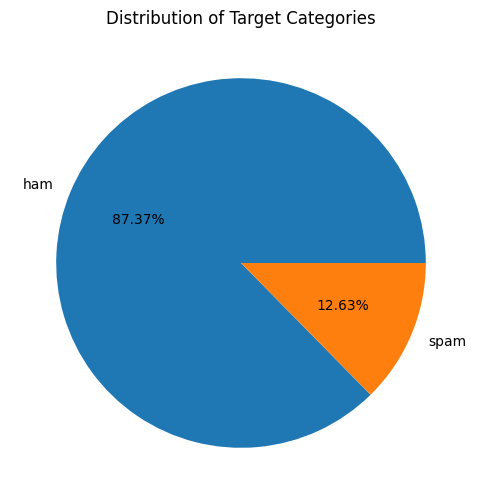

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(dataset["Target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f%%")
plt.title("Distribution of Target Categories")
plt.show()


In [ ]:
x=dataset['Message']
y=dataset['Target']

In [ ]:
print(x, y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Target, Length: 5169, dtype: object


In [ ]:
from sklearn. model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

In [ ]:
cv = CountVectorizer()

In [ ]:
x_train_cv = cv.fit_transform (x_train)
x_test_cv = cv.transform (x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train_cv, y_train)


LogisticRegression()

In [ ]:
Predict_train=LR.predict(x_train_cv)

In [ ]:
from sklearn. metrics import accuracy_score
print(accuracy_score(y_train, x_train) *100)

0.0


In [ ]:
predict_test=LR.predict(x_test_cv)

In [ ]:
from sklearn. metrics import accuracy_score
print(accuracy_score(y_test, predict_test) *100)

97.678916827853
